<H1>Discrete Fourier Transformation</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H2>Example of ideal signal</H2>

In [2]:
# create artificial wave signal
sf = 1000 # samples per second (sec^{-1})
dt = 1/sf # sampling interval (in sec)
t = np.arange(0,2, dt) # 5 seconds activity

# create a signal
wave = lambda f: np.sin(2*np.pi*f*t) 
signal = 2.5 * wave(4) + 1.5 * wave(6.5)# + 0.5*wave(2.4)

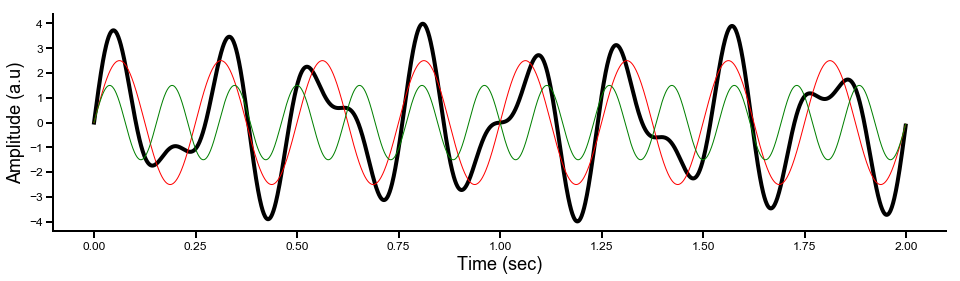

In [3]:
# plot signal and the sum of the waves
plt.figure(figsize=(16,4))
plt.plot(t,signal, lw = 4, color = 'black')
plt.plot(t, 2.5*wave(4), color='red', lw=1)
plt.plot(t, 1.5*wave(6.5), color = 'green', lw = 1)
#plt.plot(t, 0.5*wave(2.4), color= 'blue', lw = 1)
plt.xlabel("Time (sec)");plt.ylabel('Amplitude (a.u)');

<H2>Discrete Fourier transformation</H2>

In [4]:
# fourTime is the normalized time vector: we need a complex wave which is having the same
# number of points as the signal we want to analyze. It's important to keep the phase!

# you want the wave to start at zero.
FourierTime = np.arange(signal.size)/signal.size

In [5]:
# create a complex wave with the Eulers formula e^ik that depends only on the frequency
csw = lambda freq: np.exp( -1j*2*np.pi*freq*FourierTime )

In [6]:
# dot product of complex waves and signal for waves with frequencies betwen 0 and number of samples
# of the signal. It will return the Fourier coefficients (amplitude and phase) for every frequency.
FourierCoeff = list()
for f in range(len(t)):
    FourierCoeff.append( np.dot(signal, csw(f))/ signal.size ) # normalize the dot product

In [7]:
# now compute amplitudes
amp = 2*np.abs(FourierCoeff)

In [8]:
# and compute phases (in rad)
phi = np.angle(FourierCoeff)

In [9]:
# compute frequencies vector, it goes from zero (DC component) to half the sampling frequency (Nyquist)
# n/2 + 1 for the offset
Nyquist = sf/2
print('Nyquist frequency is {:2.2f} Hz'.format(Nyquist))

# To transform into Hz. If we have sf in samples/seconds, the units are Hz (e.g., sf = 30000 = 30 kHz)
# we need to know that we can only sample half of the sampling frequency (e.g., 15 kHz) but we need to express it
# in units of sampling points (e.g., 15000).


# n/2 + 1 is to take only the possitive frequencies (?)
hz = np.linspace(0, sf/2., num = int(np.floor(len(t)/2.))+1 )

Nyquist frequency is 500.00 Hz


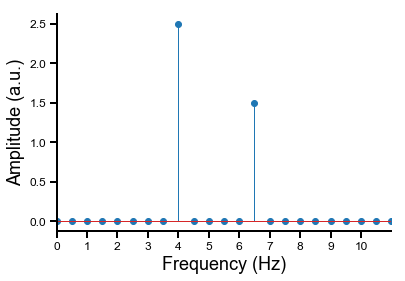

In [10]:
# plot frequencies vs amp
plt.stem(hz, amp[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,11);

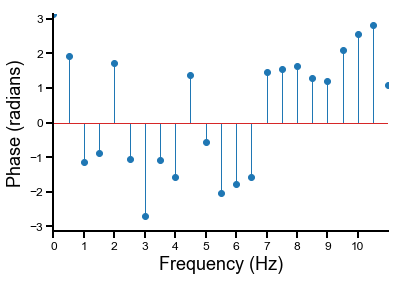

In [11]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,11);

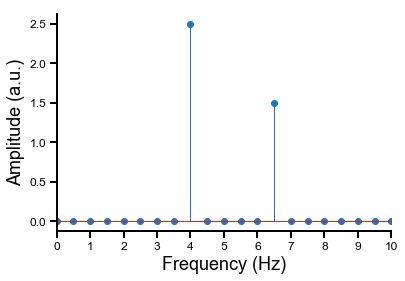

In [12]:
# with python fft
FourierCoeff = np.fft.fft(signal)/signal.size
ampl = 2*np.abs(FourierCoeff)  
phi = np.angle(FourierCoeff)

# compute frequencies vector until half the sampling rate
hz = np.linspace(0, sf/2., num = math.floor(signal.size/2) + 1 )

plt.stem(hz,ampl[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,10);

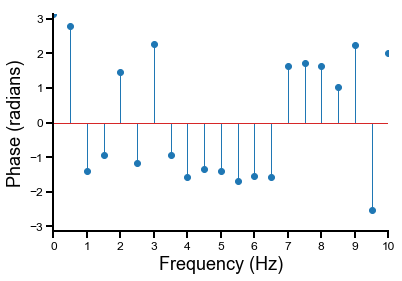

In [13]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,10);

<H2>A real example</H2>

Nyquist frequency is 3.00/hour


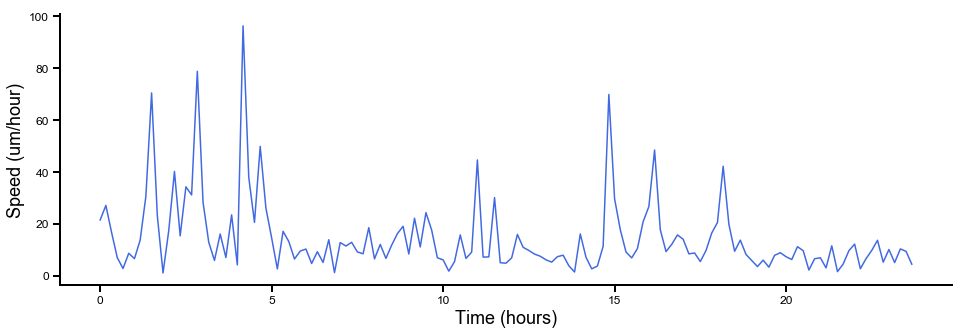

In [14]:
speed = np.loadtxt('speed.txt')

sf = 6 # samples per hour
dt = 1/sf # write sampling points in hours -1 (i.e., 6 per hour )

Nyquist = sf/2
print('Nyquist frequency is {:2.2f}/hour'.format(Nyquist))
# Nyquist frequency is 3 per hour, which is the fastest frequency we can get.
# We can have something one every 7 hours (1/7 = 0.14 ) which is slower, it can be resolved
t = np.arange(0, speed.size*dt, dt)

fig = figure(figsize=(16,5))
ax = fig.add_subplot(111)
ax.plot(t, speed, color='royalblue', lw  = 1.5);
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');
#ax.set_xticks(range(0, 25, 6));

In [15]:
# fourTime is the normalized time
normt = np.arange(speed.size)/speed.size

# create a complex wave
csw = lambda freq: np.exp( -1j*2*np.pi*freq*normt )

In [16]:
# dot product of complex waves and signal for waves betwen 0 and half the time of the recording
FourierCoeff = list()
for f in range(speed.size):
    FourierCoeff.append( np.dot(speed, csw(f))/speed.size)

In [17]:
# now compute amplitudes
# extract amplitudes
ampl = 2*np.abs(FourierCoeff)

In [18]:
phi = np.angle(FourierCoeff)

/home/segundo.martinez/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


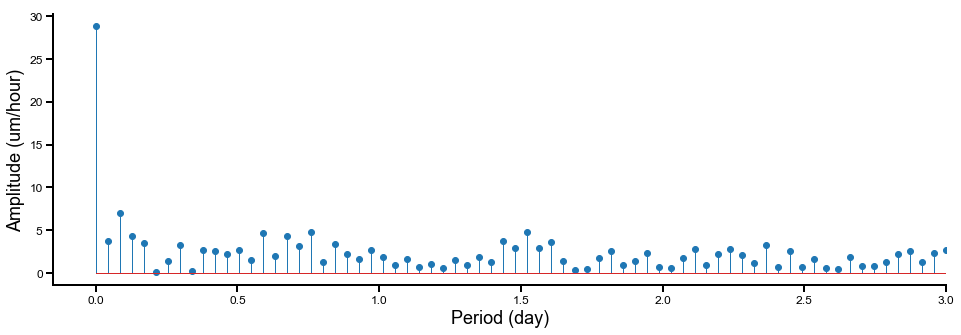

In [19]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num = math.floor(speed.size/2) + 1 )
fig = figure(figsize=(16,5))
plt.stem(hz,ampl[:len(hz)])#, use_line_collection = True)
plt.xlabel('Period (day)'), plt.ylabel('Amplitude (um/hour)')
plt.xlim(xmax=3);

/home/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/segundo.martinez/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


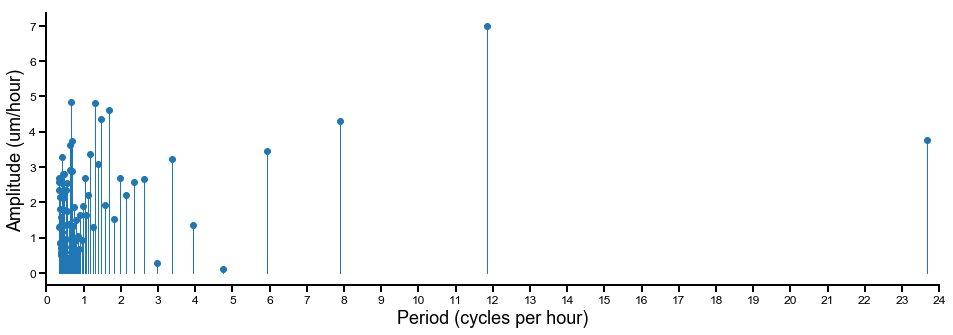

In [20]:
FourierCoeff = np.fft.fft(speed)/len(speed)
ampl = 2*np.abs(FourierCoeff)

# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )
fig = figure(figsize=(16,5))
plt.stem(1/hz,ampl[:len(hz)])#, use_line_collection = True)
plt.xlabel('Period (cycles per hour)'), plt.ylabel('Amplitude (um/hour)')
plt.xticks(arange(25))
plt.xlim(xmin =0, xmax=24);

(-3.141592653589793, 3.141592653589793)

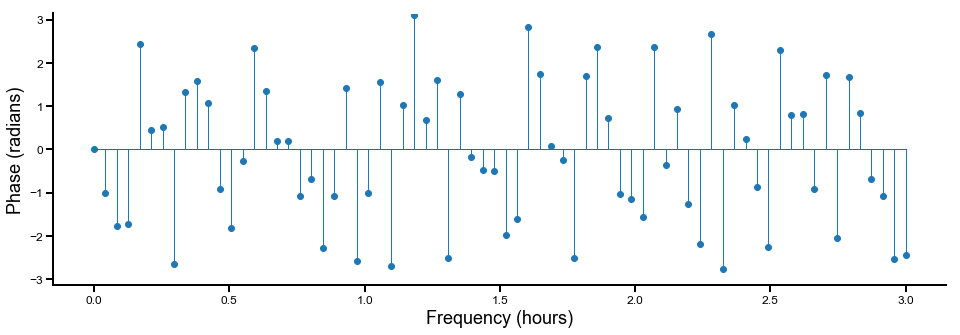

In [21]:
# compute phase vector
phi = np.angle(FourierCoeff)
fig = figure(figsize=(16,5))
plt.stem(hz,phi[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (hours)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)


<H3>Calculate the three most predominant frequencies</H3>

We don't include the DC frequency and test only until Nysquid.

In [22]:
myamps = ampl[1:hz.size] # from 1 to Nysquid
x = abs(np.sort(myamps*-1))
mysel = x[:4]

idx = np.array([np.where(myamps==i) for i in mysel] ) +1
for i in idx:
    info = (float(ampl[i]), 1/float(hz[i]), float(phi[i]) )
    print('Amplitude = %2.3f, period = %2.4f hours per cycle, phase = %2.4f radians'%info)
    #print('Amplitude = {:2.4f}, frequency = {:2/4f},  phase = {:2.4f} radians'.format( info ))

Amplitude = 6.999, period = 11.8333 hours per cycle, phase = -1.7676 radians
Amplitude = 4.831, period = 0.6574 hours per cycle, phase = -1.9834 radians
Amplitude = 4.813, period = 1.3148 hours per cycle, phase = -1.0768 radians
Amplitude = 4.622, period = 1.6905 hours per cycle, phase = 2.3417 radians


In [23]:
np.mean(speed)

14.436838153846155

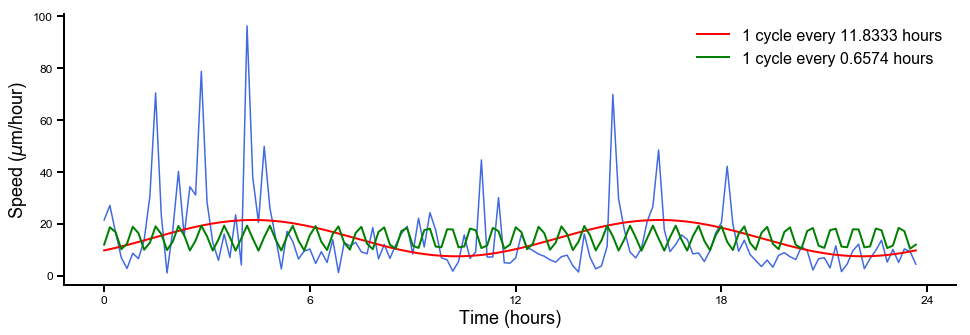

In [28]:
offset = np.mean(speed)
wave1 = offset + ampl[2]*(np.sin(2*np.pi*hz[2]*t + np.rad2deg(phi[2])))
wave2 = offset + ampl[36]*(np.sin(2*np.pi*hz[36]*t + np.rad2deg(phi[36])))
#mywave2 = offset + 7.5*np.sin(2*np.pi*(1/7)*t + np.rad2deg(phi[:len(hz)][1])) # add 5 offset because speed is alwasy positive

fig = figure(figsize=(16,5))
ax = fig.add_subplot(111)
ax.plot(t, speed, color='royalblue', lw  = 1.5);

ax.plot(t, wave1, lw = 2, color= 'red', label='1 cycle every {:2.4f} hours'.format(1/hz[2]) )
ax.plot(t, wave2, lw = 2, color='green',label='1 cycle every {:2.4f} hours'.format(1/hz[36]))

ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed ($\mu$m/hour)');
ax.set_xticks(range(0, 25, 6));
ax.legend(fontsize =16, frameon=False)
fig.savefig('Speed.png')

<H2>Calculate the DC component</H2>

In [25]:
DC = [np.abs(FourierCoeff[0])]

amp = np.concatenate( (DC, 2*np.abs(FourierCoeff[1:])) )
amp[0] == speed.mean()

True

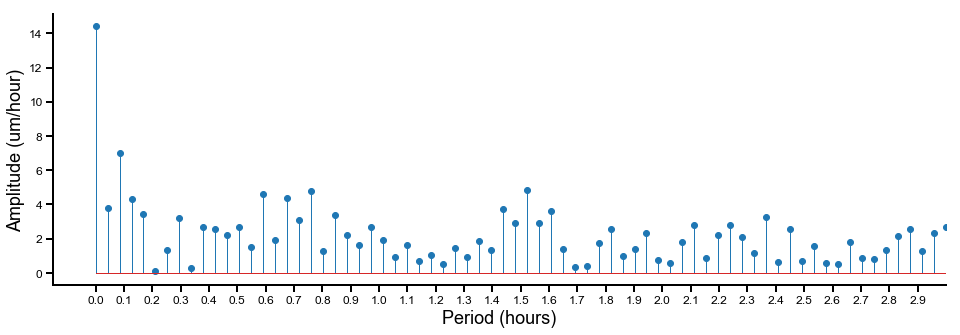

In [26]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )
fig = figure(figsize=(16,5))
plt.stem(hz,amp[:len(hz)])#, use_line_collection = True)
plt.xlabel('Period (hours)'), plt.ylabel('Amplitude (um/hour)')
plt.xticks(arange(0,3,.1))
plt.xlim(xmax=3);